# Code for Section 5: The fast Fourier transform
## This code is for learning the Fourier transform.

### mikexcohen.com

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: How the FFT works, speed tests
---


In [19]:
#/Users/jm186072/Documents/DataScience/Jupyter Notebook/Alesis-Fusion-Acoustic-Bass-C2.wav

from scipy.io import wavfile
fs, data = wavfile.read('/Users/jm186072/Documents/DataScience/Jupyter Notebook/Alesis-Fusion-Acoustic-Bass-C2.wav')#

ValueError: File format b'\xff\xfb\xb0`'... not understood.

In [3]:
fs, data = wavfile.read('/Users/jm186072/Documents/DataScience/Jupyter Notebook/Alesis-Fusion-Acoustic-Bass-C2.wav')
print('Sampling Rate',fs)
print('Length of signal',len(data))
print('Duration of signal=',len(data)/fs)
print(type(data))

## fft still need normalizations

srate = fs
time  = np.arange(0,2,1/srate)
npnts = len(time)
npnts

# signal
signal = data
print(len(signal))

# Fourier spectrum
signalX = scipy.fftpack.fft(signal)
hz = np.linspace(0,srate,npnts)

type(signalX)
print(len(signalX))
print(len(hz))

# amplitude
ampl = np.abs(signalX[0:len(hz)])
print(len(ampl))

print(hz)
print(ampl)
print(hz.shape)
print(ampl.shape)

ampl[:,0]

plt.stem(hz,ampl[:,0])
plt.xlim(0,10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

def make_stem(ax, x, y, **kwargs):
    ax.axhline(x[0],x[-1],0, color='r')

    ax.vlines(x, 0, y, color='b')

    ax.set_ylim([1.05*y.min(), 1.05*y.max()])

# Plotting Code

fig, ax = plt.subplots()
make_stem(ax, hz, ampl[:,0])

plt.plot(time,signal[0:88200,0])

Sampling Rate 44100
Length of signal 127782
Duration of signal= 2.897551020408163
<class 'numpy.ndarray'>


In [21]:
import time, wave

In [18]:
f= wave.open( '/Users/jm186072/Documents/DataScience/Jupyter Notebook/Kitty-meow.mp3', 'rb' )
sampleRate= f.getframerate()
channels= f.getnchannels()
format= sound.AFMT_S16_LE
snd= sound.Output( sampleRate, channels, format )
s= f.readframes( 300000 )
snd.play( s )

ImportError: No module named 'pymedia'

In [ ]:
from pygame import mixer
mixer.init()
mixer.music.load("mysong.mp3")
mixer.music.play()

In [24]:
import thinkdsp
#import thinkplot
#import thinkstats2

ImportError: cannot import name 'thinkdsp'

In [22]:
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib as plt


response = thinkdsp.read_wave('/Users/jm186072/Documents/DataScience/Jupyter Notebook/Alesis-Fusion-Acoustic-Bass-C2.wav')
response = response.segment(start=0, duration=5.0)
response.normalize()
response.plot()
thinkplot.Config(xlabel='time(s)',
                ylabel='Amplitute',
                ylim=[-1.05, 1.05],
                legand= False)
response.make_audio()

ImportError: No module named 'thinkdsp'

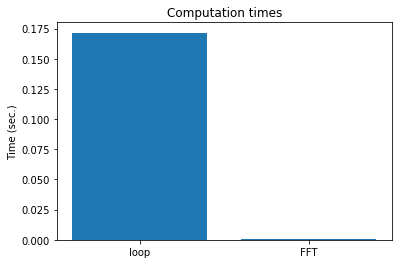

In [26]:
# create the signal
pnts   = 1000
signal = np.random.randn(pnts)


# start the timer for "slow" Fourier transform
tic = timeit.default_timer()

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# end timer for slow Fourier transform
toc = timeit.default_timer()
t1 = toc-tic


# time the fast Fourier transform
tic = timeit.default_timer()
fCoefsF = scipy.fftpack.fft(signal)
toc = timeit.default_timer()
t2 = toc-tic

# and plot
plt.bar([1,2],[t1,t2])
plt.title('Computation times')
plt.ylabel('Time (sec.)')
plt.xticks([1,2], ['loop','FFT'])
plt.show()


In [30]:
## fft still need normalizations

srate = 1000
time  = np.arange(0,2,1/srate)
npnts = len(time)

# signal
signal = 2*np.sin(2*np.pi*10*time)

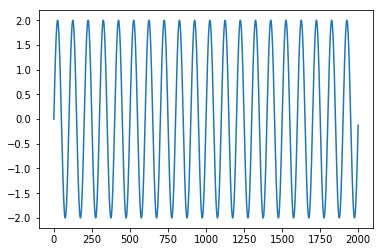

In [31]:
plt.plot(signal)

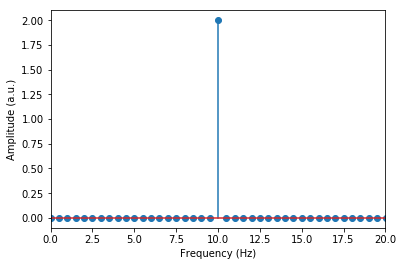

In [34]:
# Fourier spectrum
signalX = scipy.fftpack.fft(signal)
hz = np.linspace(0,srate,npnts)

# amplitude
ampl = 2*np.abs(signalX[0:len(hz)])

plt.stem(hz,ampl/npnts)
plt.xlim(0,20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.show()


---
# VIDEO: The fast inverse Fourier transform
---


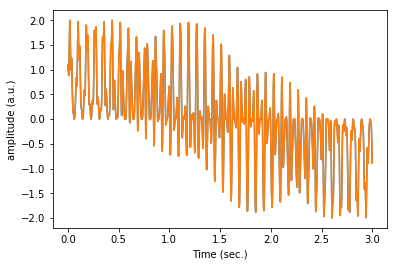

In [5]:
# set parameters
srate = 1000
time  = np.arange(0,3,1/srate)
pnts  = len(time)

# create multispectral signal
signal  = np.multiply( (1+np.sin(2*np.pi*12*time)) , np.cos(np.sin(2*np.pi*25*time)+time) )

# fft
signalX = scipy.fftpack.fft(signal)

# reconstruction via ifft
reconSig = scipy.fftpack.ifft(signalX)

plt.plot(time,signal,label='Original')
plt.plot(time,np.real(reconSig),label='Reconstructed')
plt.xlabel('Time (sec.)')
plt.ylabel('amplitude (a.u.)')
plt.show()


---
# VIDEO: The perfection of the Fourier transform
---


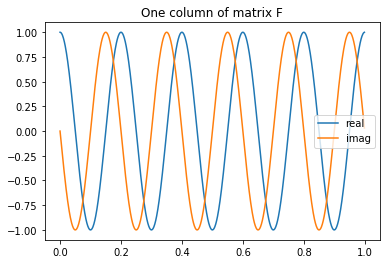

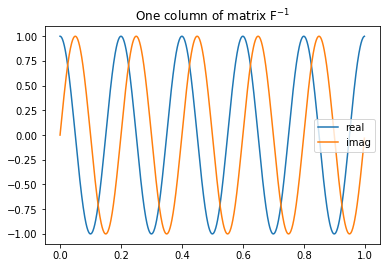

In [6]:
# number of time points
pnts = 1000 

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
F        = np.zeros((pnts,pnts),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # put csw into column of matrix F
    F[:,fi] = csw

# compute inverse of F (and normalize by N)
Finv = np.linalg.inv(F)*pnts

# plot one sine wave
plt.plot(fourTime,np.real(F[:,5]),label='real')
plt.plot(fourTime,np.imag(F[:,5]),label='imag')
plt.title('One column of matrix F')
plt.legend()
plt.show()

plt.plot(fourTime,np.real(Finv[:,5]),label='real')
plt.plot(fourTime,np.imag(Finv[:,5]),label='imag')
plt.title('One column of matrix F$^{-1}$')
plt.legend()
plt.show()